In [86]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [87]:
df = pd.read_csv('College_K_Means.csv')
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [88]:
#Label Encoding
label_encoder = preprocessing.LabelEncoder()
df['private'] = label_encoder.fit_transform(df['private'])
df['private'].unique()

array([1, 0])

In [89]:
# Data Pre-processing
# Check for missing values
print(df.isnull().sum() != 0)

private        False
apps           False
accept         False
enroll         False
top10perc      False
top25perc      False
f_undergrad    False
p_undergrad    False
outstate       False
room_board     False
books          False
personal       False
phd            False
terminal       False
s_f_ratio      False
perc_alumni    False
expend         False
grad_rate      False
dtype: bool


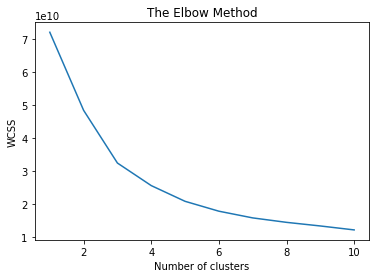

In [90]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [93]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(df)

In [94]:
# 3. Training the K-means algorithm on the training dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(x)

y_kmeans

array([0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0,

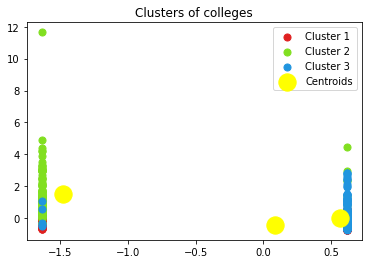

In [99]:
# 4. Visualizing the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = '#DF2020', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = '#81DF20', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = '#2095DF', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of colleges')
plt.legend()
plt.show()